<a href="https://colab.research.google.com/github/mucollabo/firstRNN/blob/main/testMyHandwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.special
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
  # 신경망 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    # 입력, 은닉, 출력 계층의 노드 개수 설정
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    # 가중치 행렬 wih와 who
    # 배열 내 가중치는 w_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
    # w11 w21
    # w12 w22 등
    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr = learningrate

    # 활성화 함수로는 시그모이드 함수를 이용
    self.activation_function = lambda x: scipy.special.expit(x)

    pass

  # 신경망 학습시키기
  def train(self, inputs_list, targets_list):
    # 입력 리스트를 2차원의 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs = np.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs = self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs = np.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs = self.activation_function(final_inputs)

    # 출력 계층의 오차는 (실제 값 - 계산 값)
    output_errors = targets - final_outputs
    # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors = np.dot(self.who.T, output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))

    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

    pass

  # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력 리스트를 2차원 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs = np.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs = self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs = np.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 500
output_nodes = 10

# 학습률
learning_rate = 0.1

# 신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open("/content/drive/MyDrive/ColabNotebooks/myo_gan/mnist_data/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기

# 주기(ecpoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 5

for e in range(epochs):
  # 학습 데이터 모음 내의 모든 레코드 탐색
  for record in training_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0]은 이 레코드에 대한 결과 값
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass
  pass

# # mnist 테스트 데이터인 csv 파일을 리스트로 불러오기
# test_data_file = open("/content/drive/MyDrive/ColabNotebooks/myo_gan/mnist_data/mnist_test.csv", 'r')
# test_data_list = test_data_file.readlines()
# test_data_file.close()

# # 신경망 테스트하기

# # 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
# scorecard = []

# # 테스트 데이터 모음 내의 모든 레코드 탐색
# for record in test_data_list:
#   # 레코드를 쉼표에 의해 분리
#   all_values = record.split(',')
#   # 정답은 첫 번째 값
#   correct_label = int(all_values[0])
#   # 입력 값의 범위와 값 조정
#   inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#   # 신경망에 질의
#   outputs = n.query(inputs)
#   # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
#   label = np.argmax(outputs)
#   # 정답 또는 오답을 리스트에 추가
#   if (label == correct_label):
#     # 정담인 경우 성적표에 1을 더함
#     scorecard.append(1)
#   else:
#     # 정답이 아인경우 성적표에 0을 더함
#     scorecard.append(0)
#     pass
#   pass
  
# # 정답의 비율인 성적을 계산해 출력
# scorecard_array = np.asarray(scorecard)
# print("performance = ", scorecard_array.sum() / scorecard_array.size)



In [3]:
!pip install Pillow

In [7]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

# myHandwriting을 디코딩하기
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('/content/drive/MyDrive/ColabNotebooks/firstRNN/myHandwriting_data/hw_?.png'):
  
  # use the filename to set the correct label
  label = int(image_file_name[-5:-4])

  # load imgae data from png files into an array
  print("loading ... ", image_file_name)
  img_array = imageio.imread(image_file_name, as_gray=True)
  
  # reshape from 28x28 to list of 784 values, invert values
  img_data = 255.0 - img_array.reshape(784)

  # then scale data to range from 0.01 to 1.0
  img_data = (img_data / 255.0 * 0.99) + 0.01
  print(np.min(img_data))
  print(np.max(img_data))

  # append label and image data to test data set
  record = np.append(label, img_data)
  our_own_dataset.append(record)

  pass

loading ...  /content/drive/MyDrive/ColabNotebooks/firstRNN/myHandwriting_data/hw_4.png
0.01
0.44482353
loading ...  /content/drive/MyDrive/ColabNotebooks/firstRNN/myHandwriting_data/hw_5.png
0.01
0.43317646
loading ...  /content/drive/MyDrive/ColabNotebooks/firstRNN/myHandwriting_data/hw_2.png
0.01
0.8563529
loading ...  /content/drive/MyDrive/ColabNotebooks/firstRNN/myHandwriting_data/hw_3.png
0.01
1.0
loading ...  /content/drive/MyDrive/ColabNotebooks/firstRNN/myHandwriting_data/hw_6.png
0.01
0.9572941
loading ...  /content/drive/MyDrive/ColabNotebooks/firstRNN/myHandwriting_data/hw_7.png
0.01
1.0
loading ...  /content/drive/MyDrive/ColabNotebooks/firstRNN/myHandwriting_data/hw_1.png
0.01
0.091529414


[[1.46625462e-05]
 [4.56985802e-05]
 [3.91962874e-04]
 [3.46137823e-06]
 [4.52404744e-04]
 [4.38140122e-02]
 [1.67525342e-05]
 [1.52858150e-03]
 [1.36138311e-08]
 [8.80496734e-06]]
network says  5
no match!


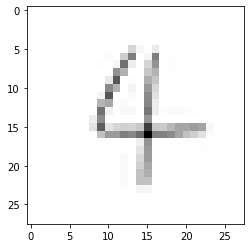

In [8]:
# test the neural network with our own images

# record to test
item = 0

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

[[1.35577378e-05]
 [5.99749380e-06]
 [9.79301746e-05]
 [1.37156533e-06]
 [1.13125512e-05]
 [7.87450394e-01]
 [8.06103410e-06]
 [1.04127724e-03]
 [4.73116707e-08]
 [1.77255885e-06]]
network says  5
match!


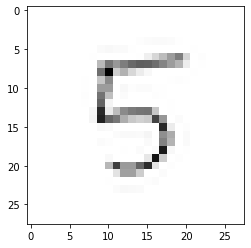

In [9]:
# test the neural network with our own images

# record to test
item = 1

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

[[8.34399631e-03]
 [1.61101840e-03]
 [1.67093653e-01]
 [9.06601743e-03]
 [4.68572465e-03]
 [3.02885272e-02]
 [1.37244194e-03]
 [1.64824352e-04]
 [1.40108393e-02]
 [3.17447851e-04]]
network says  2
match!


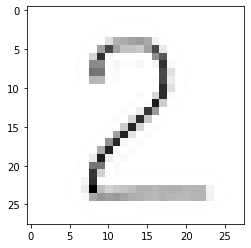

In [10]:
# test the neural network with our own images

# record to test
item = 2

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

[[8.66560245e-04]
 [2.23232692e-03]
 [5.39839866e-04]
 [8.53072133e-01]
 [7.64564510e-04]
 [1.29090831e-02]
 [4.29162742e-04]
 [8.74544256e-03]
 [2.90395897e-06]
 [7.76038937e-03]]
network says  3
match!


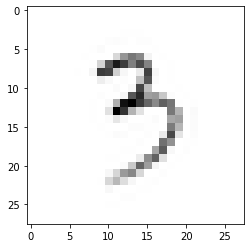

In [11]:
# test the neural network with our own images

# record to test
item = 3

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

[[2.38938772e-03]
 [9.28475193e-04]
 [2.90731600e-03]
 [1.58297360e-03]
 [3.66940180e-04]
 [2.17265445e-01]
 [5.59663662e-01]
 [1.91502928e-03]
 [5.07742290e-04]
 [1.29905558e-02]]
network says  6
match!


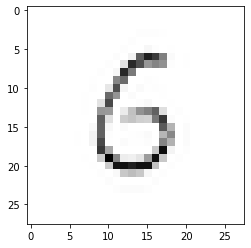

In [12]:
# test the neural network with our own images

# record to test
item = 4

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

[[3.80536261e-03]
 [1.85350681e-03]
 [7.15126645e-04]
 [3.70855917e-04]
 [4.72080741e-04]
 [1.07598320e-02]
 [3.46147799e-04]
 [9.56108271e-01]
 [7.80638836e-05]
 [4.10858461e-03]]
network says  7
match!


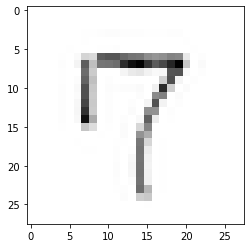

In [13]:
# test the neural network with our own images

# record to test
item = 5

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

[[3.38787419e-09]
 [1.47375069e-09]
 [1.37552420e-07]
 [1.00011574e-11]
 [4.26062053e-11]
 [7.93643667e-02]
 [3.71422925e-11]
 [8.93272816e-07]
 [5.47244624e-18]
 [2.76289432e-15]]
network says  5
no match!


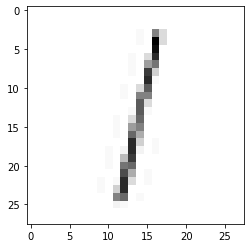

In [14]:
# test the neural network with our own images

# record to test
item = 6

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass